## Integrantes del grupo

*   Leonardo Gamboa Uribe
*   Camilo Torrón Sosa
*   Víctor Manuel de la Rosa Sánchez
*   Jesús María Herruzo Luque

|                                                                                 |    |    |         |
|---------------------------------------------------------------------------------|----|----|---------|
|                                                                                 | Sí | No | A veces |
| Todos los miembros se han integrado al trabajo del grupo                        | X  |    |         |
| Todos los miembros participan activamente                                       | X  |    |         |
| Todos los miembros respetan otras ideas aportadas                               | X  |    |         |
| Todos los miembros participan en la elaboración del informe                     | X  |    |         |
| Me he preocupado por realizar un trabajo cooperativo con mis compañeros         | X  |    |         |
| Señala si consideras que algún aspecto del trabajo en grupo no ha sido adecuado |    | X  |         |


# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [ ]:
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7f676c7878d0>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.269.jpg', 'cat.44.jpg', 'cat.51.jpg', 'cat.456.jpg', 'cat.994.jpg', 'cat.378.jpg', 'cat.768.jpg', 'cat.921.jpg', 'cat.211.jpg', 'cat.669.jpg']
['dog.831.jpg', 'dog.387.jpg', 'dog.914.jpg', 'dog.678.jpg', 'dog.695.jpg', 'dog.876.jpg', 'dog.752.jpg', 'dog.471.jpg', 'dog.754.jpg', 'dog.378.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de trenes y validación:

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuroanl convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


In [ ]:
import tensorflow as tf
import keras

In [ ]:
input_shape = [150, 150, 3]

In [ ]:
def build_model(input_shape):
  model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
  ])

  return model

In [ ]:
model = build_model(input_shape)

Se comprueba el modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [ ]:
metrics = ['accuracy']
loss = 'binary_crossentropy'
optimizer = 'RMSprop'

In [ ]:
# tu código para la compilación del ejercicio 2 aquí
model.compile(optimizer=optimizer, loss = loss, metrics=metrics)

# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación.

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [ ]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí
steps_per_epoch = 100 #2000/20
epochs = 20
validation_steps = 50 #1000/20
verbose = 2

In [ ]:
history = model.fit(
    x = train_generator,
    validation_data = validation_generator,
    epochs = epochs,
    steps_per_epoch=steps_per_epoch, 
    verbose=verbose)

Epoch 1/20
100/100 - 25s - loss: 0.7415 - accuracy: 0.5865 - val_loss: 0.6428 - val_accuracy: 0.6510
Epoch 2/20
100/100 - 7s - loss: 0.5581 - accuracy: 0.7150 - val_loss: 0.5978 - val_accuracy: 0.6980
Epoch 3/20
100/100 - 8s - loss: 0.4433 - accuracy: 0.8025 - val_loss: 0.6188 - val_accuracy: 0.6960
Epoch 4/20
100/100 - 7s - loss: 0.3210 - accuracy: 0.8740 - val_loss: 0.6340 - val_accuracy: 0.7130
Epoch 5/20
100/100 - 8s - loss: 0.2368 - accuracy: 0.9100 - val_loss: 0.7847 - val_accuracy: 0.6740
Epoch 6/20
100/100 - 7s - loss: 0.1593 - accuracy: 0.9440 - val_loss: 0.7851 - val_accuracy: 0.6980
Epoch 7/20
100/100 - 8s - loss: 0.1159 - accuracy: 0.9650 - val_loss: 0.9472 - val_accuracy: 0.6820
Epoch 8/20
100/100 - 7s - loss: 0.0716 - accuracy: 0.9805 - val_loss: 1.3048 - val_accuracy: 0.6550
Epoch 9/20
100/100 - 7s - loss: 0.0715 - accuracy: 0.9795 - val_loss: 1.2234 - val_accuracy: 0.6570
Epoch 10/20
100/100 - 7s - loss: 0.0596 - accuracy: 0.9855 - val_loss: 1.3585 - val_accuracy: 0.696

# 4. Evaluando la precisión y la perdida del modelo


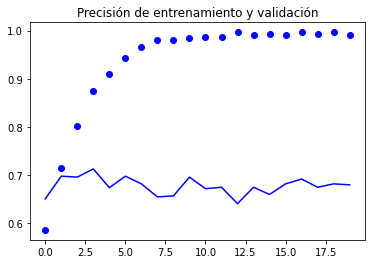

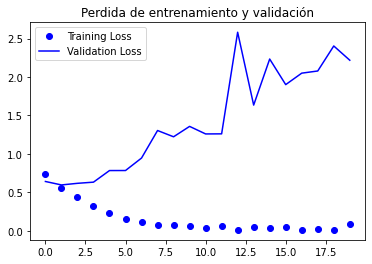

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

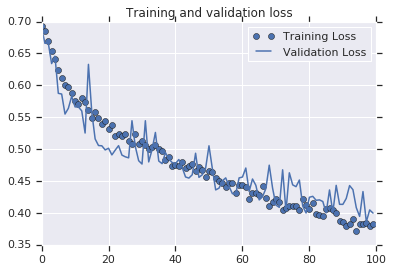
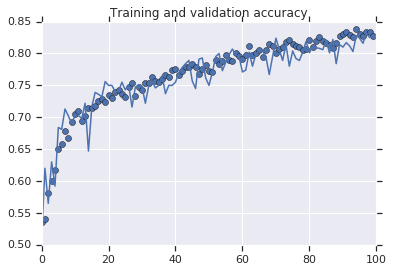

In [ ]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###

## Reduciendo el overfitting

Para mejorar los resultados de nuestra red y evitar el overfitting hemos dos técnicas diferentes:


*   dropout: técnica de regularización que aleatoriamente fija la salida de determinadas neuronas a cero para permitir que el modelo sea capaz de generalizar y reducir la probabilidad de que se produzca el overfitting. Al aplicar esta técnica, usamos un valor pequeño en cada bloque convolucional (capa de convolución, capa de pooling, capa de dropout) y un valor superior en la capa fully conected, ya está tiene más conexiones y está conectada directamente con la salida de la red, por lo que queremos asegurarnos de que el resultado no lo determinen sólamente un par de neuronas con valores elevados.
*   data augmentation: consistente en aplicar transformaciones sencillas a las imágenes de entrenamiento para evitar que la red memorice los datos. Estas transformaciones suelen ser voltear, girar, desplazar o acercar/alejar entre otras. Hemos elegido unos valores pequeños que han dado resultados buenos, pero se pueden realizar muchos experimentos jugando con estos valores para intentar alcanzar mayor precisión y menor overfitting.



In [ ]:
# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                    rotation_range = 0.5, #giramos la imagen
                                    width_shift_range = 0.1, #movemos la imagen lateralmente
                                    height_shift_range = 0.1, #movemos la imagen verticalmente
                                    shear_range = 0.1, #estiramos la imagen
                                    zoom_range = [0.9, 1.1], #acercamos o alejamos el foco
                                    horizontal_flip = True #giramos horizontalmente
                                    )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
input_shape = [150, 150, 3]
steps_per_epoch = 100 #2000/20
epochs = 50
validation_steps = 50 #1000/20
verbose = 2
metrics = ['accuracy']
loss = 'binary_crossentropy'
optimizer = 'RMSprop'

def build_advanced_model(input_shape):
  model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),    
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
  ])

  return model

advanced_model = build_advanced_model(input_shape)
advanced_model.summary()  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

In [ ]:
advanced_model.compile(optimizer=optimizer, loss = loss, metrics=metrics)

In [ ]:
history = advanced_model.fit(
    x = train_generator,
    validation_data = validation_generator,
    epochs = epochs,
    steps_per_epoch=steps_per_epoch, 
    verbose=verbose)

Epoch 1/50
100/100 - 17s - loss: 0.9446 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5280
Epoch 2/50
100/100 - 16s - loss: 0.6969 - accuracy: 0.5030 - val_loss: 0.6819 - val_accuracy: 0.6160
Epoch 3/50
100/100 - 16s - loss: 0.6838 - accuracy: 0.5795 - val_loss: 0.6345 - val_accuracy: 0.6440
Epoch 4/50
100/100 - 16s - loss: 0.6513 - accuracy: 0.6265 - val_loss: 0.6243 - val_accuracy: 0.6460
Epoch 5/50
100/100 - 16s - loss: 0.6362 - accuracy: 0.6425 - val_loss: 0.6154 - val_accuracy: 0.6710
Epoch 6/50
100/100 - 16s - loss: 0.6147 - accuracy: 0.6745 - val_loss: 0.5795 - val_accuracy: 0.7110
Epoch 7/50
100/100 - 16s - loss: 0.6172 - accuracy: 0.6610 - val_loss: 0.5648 - val_accuracy: 0.7080
Epoch 8/50
100/100 - 16s - loss: 0.6004 - accuracy: 0.6725 - val_loss: 0.5671 - val_accuracy: 0.7020
Epoch 9/50
100/100 - 16s - loss: 0.5904 - accuracy: 0.6835 - val_loss: 0.5567 - val_accuracy: 0.7060
Epoch 10/50
100/100 - 16s - loss: 0.5764 - accuracy: 0.6970 - val_loss: 0.5620 - val_accura

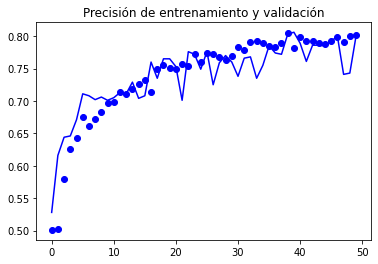

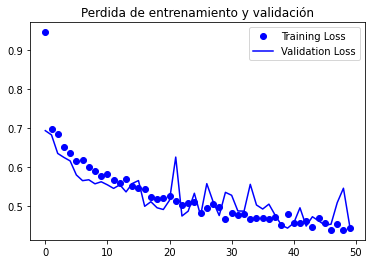

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

## Mejorando aún más

Aunque los resultados del modelo previo son mejores que los originales y no presentan overfitting, probamos un segundo modelo donde añadimos un par de cambios adicionales.

Por un lado, modificamos el generador para trabajar con imágenes en escala de grises. De esta forma reducimos la dependencia de la red a determinadas cualidades del color que pueden ser fruto de la cámara usada, la iluminación u otras circunstancias y no propiamente características de los perros o gatos.

Por otro lado, añadimos un último bloque de convolución, ya que el modelo previo no presentaba aún overfitting, para intentar extraer mayor cantidad de características relevantes.

Adicionalmente, se han probado otros modelos con diferentes opciones que comentamos brevemente:

*   learning rate: se ha probado con diferentes learning rates, ya que la oscilación de la precisión puede hacer pensar que es demasiado alto. Se han usado schedulers para ir reduciéndolo conforme avanza el entrenamiento, pero los resultados no han sido satisfactorios.
*   batch normalization: en lugar de dropout, se ha intentado usar capas de batch normalization con el objetivo de estandarizar las salidas de las capas y que la red no dependa tanto de determinadas neuronas con un peso elevado. Igualmente, los resultados no han sido especialmente buenos, por lo que se ha descartado en favor del dropout.


## Conclusión



En conclusión, el modelo final que sigue presenta buenos resultados, con una precisión rozando el 0.85 y que no muestra signos de overfitting durante los 50 epochs en los que ha sido entrenado. Aunque la cantidad de datos disponibles es baja, quizá se pueda conseguir un resultado mejor entrenando durante más epochs, teniendo la precaución de usar algun método de early stopping.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

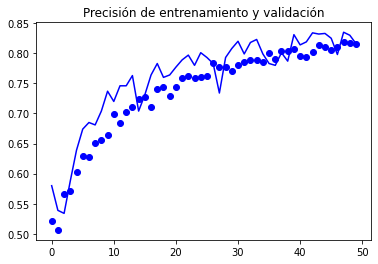

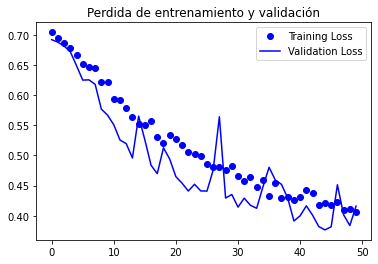

In [ ]:
input_shape = [150, 150, 1]
steps_per_epoch = 100 #2000/20
epochs = 50
validation_steps = 50 #1000/20
verbose = 2
metrics = ['accuracy']
loss = 'binary_crossentropy'
optimizer = 'RMSprop'

#----------------------------------------------------------------------------------------------------------------
test_model = keras.models.Sequential([
  keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(32, (3,3), activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D((2,2)),    
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(128, (3,3), activation='relu'),
  keras.layers.MaxPooling2D((2,2)),    
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation="sigmoid")
])
test_model.summary()  
test_model.compile(optimizer=optimizer, loss = loss, metrics=metrics)
#----------------------------------------------------------------------------------------------------------------
# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                    rotation_range = 0.5, #giramos la imagen
                                    width_shift_range = 0.1, #movemos la imagen lateralmente
                                    height_shift_range = 0.1, #movemos la imagen verticalmente
                                    shear_range = 0.1, #estiramos la imagen
                                    zoom_range = [0.9, 1.1], #acercamos o alejamos el foco
                                    horizontal_flip = True #giramos horizontalmente
                                    )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    color_mode='grayscale',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         color_mode='grayscale',
                                                         target_size = (150, 150))
#----------------------------------------------------------------------------------------------------------------
history = test_model.fit(
    x = train_generator,
    validation_data = validation_generator,
    epochs = epochs,
    steps_per_epoch=steps_per_epoch, 
    verbose=verbose)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()
plt.show()